In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #omit info 
from learnMSA.msa_hmm import Configuration, Align, Visualize, Clustering
from learnMSA.msa_hmm.SequenceDataset import SequenceDataset
import numpy as np

2025-01-02 18:28:46.058666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-02 18:28:46.074840: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-02 18:28:46.079891: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1735838927.415388  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735838927.450871  684223 cuda_executor.cc:1015] succ

## learnMSA demo

In this notebook, we will fit a number of HMM models to a dataset of unaligned sequences. 
We will then use the fitted models to align the sequences and compare the results.
Moreover, we will visualize the best (according to an objective criterion) model and alignment.

*This notebook is meant to be a demo for running learnMSA in Python code. Check the readme if you want to run learnMSA from the command line.* 

Change the variables in the following cell to fit your needs.

In [2]:
# Your fasta file with unaligned sequences.

train_filename = "test/data/egf.fasta"

# Reference file with aligned sequences that have matching IDs to (potentially a subset of) the 
# sequences in the train_file.
# Replace with empty string if no reference is available.
ref_filename = "test/data/egf.ref"

# The number of independently trained models.
num_models = 10

# Use sequence weights based on a rapid pre-clustering of the sequences (requires mmseqs2 to be installed)
use_weights = True

# Align long insertions with an external aligner left unaligned by the main MSA stage (requires famsa to be installed).
align_insertions = True

## Run learnMSA from Python (Training + Viterbi alignment)

Training of 10 models on file egf.fasta
Configuration: 
{
num_models : 10
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=7000, alpha_single=100

I0000 00:00:1735838935.002222  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735838935.002469  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735838935.002626  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735838935.002825  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/10


I0000 00:00:1735838939.274062  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735838939.274322  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735838939.274479  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735838939.274676  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

34/34 - 44s - 1s/step - loss: 85.7430 - loglik: -8.0542e+01 - prior: -5.2009e+00 - aux_loss: 0.0000e+00
Epoch 2/10
34/34 - 5s - 151ms/step - loss: 64.5413 - loglik: -6.2661e+01 - prior: -1.8801e+00 - aux_loss: 0.0000e+00
Epoch 3/10
34/34 - 5s - 150ms/step - loss: 63.1561 - loglik: -6.1442e+01 - prior: -1.7144e+00 - aux_loss: 0.0000e+00
Epoch 4/10
34/34 - 5s - 154ms/step - loss: 62.9581 - loglik: -6.1280e+01 - prior: -1.6777e+00 - aux_loss: 0.0000e+00
Epoch 5/10
34/34 - 5s - 150ms/step - loss: 62.7858 - loglik: -6.1133e+01 - prior: -1.6530e+00 - aux_loss: 0.0000e+00
Epoch 6/10
34/34 - 5s - 155ms/step - loss: 62.8131 - loglik: -6.1176e+01 - prior: -1.6374e+00 - aux_loss: 0.0000e+00
Fitted model successfully.
Creating alignment model...
Successfully created alignment model.


I0000 00:00:1735839013.450375  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839013.450625  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839013.450780  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839013.450977  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

expansions model 0: [(12, 3), (13, 4), (16, 1), (18, 2)]
discards model 0: []
expansions model 1: [(12, 2), (13, 2), (19, 1), (21, 2)]
discards model 1: []
expansions model 2: [(12, 3), (13, 4), (16, 1), (17, 2)]
discards model 2: []
expansions model 3: [(12, 2), (13, 3), (14, 1), (17, 1), (19, 2)]
discards model 3: []
expansions model 4: [(12, 7), (13, 1), (14, 1)]
discards model 4: []
expansions model 5: [(12, 2), (13, 2), (15, 2), (16, 1)]
discards model 5: []
expansions model 6: [(12, 2), (13, 2), (15, 2), (18, 1)]
discards model 6: []
expansions model 7: [(12, 7), (13, 1), (14, 1), (16, 2)]
discards model 7: []
expansions model 8: [(12, 2), (13, 3), (14, 1), (17, 1), (18, 1)]
discards model 8: []
expansions model 9: [(12, 7), (13, 1), (14, 1)]
discards model 9: []
Re-initialized the encoder parameters.
Fitting models of lengths [34, 34, 34, 34, 32, 34, 34, 33, 33, 32] on 7774 sequences.
Batch size= 256 Learning rate= 0.1
Using sequence weights  [1.         1.         1.         ..

I0000 00:00:1735839022.010488  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839022.010764  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839022.010925  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839022.011127  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/10


I0000 00:00:1735839025.829328  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839025.829579  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839025.829739  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839025.829940  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

34/34 - 44s - 1s/step - loss: 63.6435 - loglik: -5.8560e+01 - prior: -5.0835e+00 - aux_loss: 0.0000e+00
Epoch 2/10
34/34 - 5s - 151ms/step - loss: 58.7148 - loglik: -5.6981e+01 - prior: -1.7338e+00 - aux_loss: 0.0000e+00
Epoch 3/10
34/34 - 5s - 155ms/step - loss: 58.4924 - loglik: -5.6994e+01 - prior: -1.4987e+00 - aux_loss: 0.0000e+00
Epoch 4/10
34/34 - 5s - 153ms/step - loss: 58.2840 - loglik: -5.6832e+01 - prior: -1.4524e+00 - aux_loss: 0.0000e+00
Epoch 5/10
34/34 - 5s - 153ms/step - loss: 58.2036 - loglik: -5.6789e+01 - prior: -1.4147e+00 - aux_loss: 0.0000e+00
Epoch 6/10
34/34 - 5s - 155ms/step - loss: 58.2186 - loglik: -5.6835e+01 - prior: -1.3840e+00 - aux_loss: 0.0000e+00
Fitted model successfully.
Creating alignment model...
Successfully created alignment model.
Time for alignment: 163.6998
Likelihoods:  ['-56.8501', '-56.9140', '-56.9350', '-56.9135', '-56.9318', '-56.9292', '-56.9099', '-56.8940', '-56.9512', '-56.8806']
Mean likelihood:  -56.91094427086682
Selection criteri

I0000 00:00:1735839102.532299  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839102.532562  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839102.532722  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839102.532925  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Aligning 1 insertion slices with famsa.
time for generating output: 4.5060
Wrote file test/data/interactive.alignment.fasta
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step
>l=-55.15_t=0.01
..........$CD.......P......N............P.........CYN.H.G..T..CS......L..R....................-......-A.....T......G........YTCSCL..-PR......Y...T....GEH$.......................
>l=-54.54_t=0.01
..........$CD.......S......Q............P.........CRN.G.-..T..CSl.....N..T....................-......-N.....T......D........YTCACF..-PG......Y...T....GRY$.......................
>l=-45.58_t=0.01
..........$CD.......S......D............P.........CLN.G.G..T..CT......L..R....................-......SL.....D......S........YSCACA..-PG......Y...T....GQH$.......................
>l=-60.95_t=0.01
..........$CD.......H......V............T.........CLN.G.G..T..CQ......L..K....................-......TL.....E......D........YTCACA..-NG......Y...T....GER$.......................
>l=-61.78_t=0.01
..........$CD.......H......V..........

/home/felix/miniforge3/envs/learnMSAdev/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['sequences', 'indices']. Received: the structure of inputs=('*', '*')
  warnings.warn(
I0000 00:00:1735839115.466155  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839115.466393  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735839115.466553  684223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but the

InvalidArgumentError: Exception encountered when calling ProfileHMMEmitter.call().

[1m{{function_node __wrapped__Einsum_N_2_device_/job:localhost/replica:0/task:0/device:GPU:0}} Expected dimension 1 at axis 0 of the input shaped [10,24,71] but got dimension 10 [Op:Einsum] name: [0m

Arguments received by ProfileHMMEmitter.call():
  • inputs=tf.Tensor(shape=(1, 10, 32, 24), dtype=float32)
  • end_hints=None
  • training=False

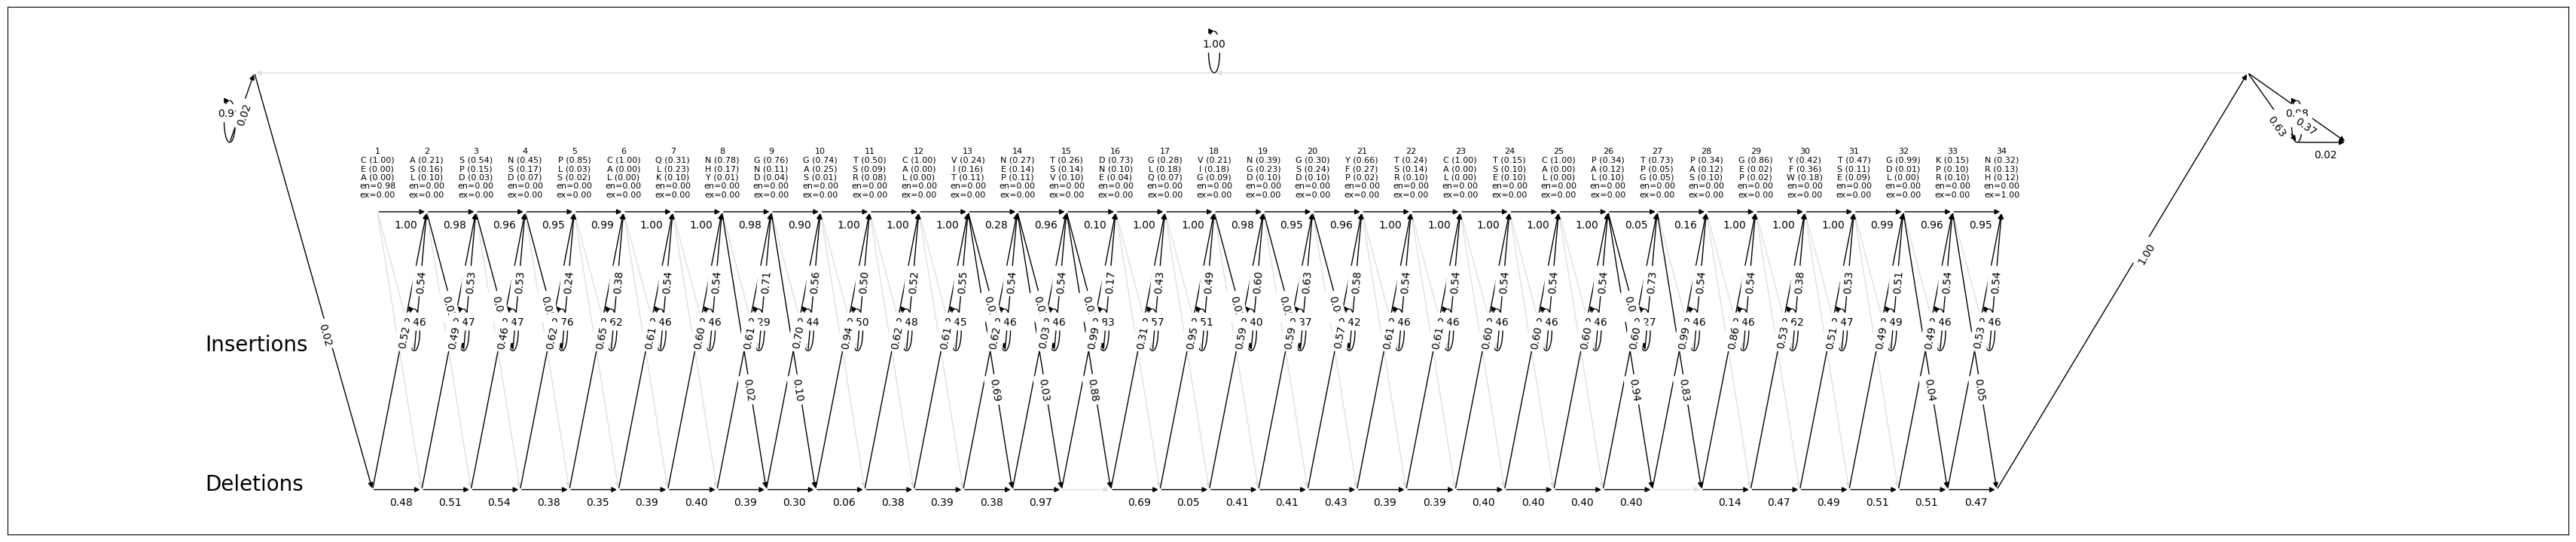

In [3]:
out_filename = "test/data/interactive.alignment.fasta"
config = Configuration.make_default(num_models)
with SequenceDataset(train_filename, fmt="fasta") as data:
    config["crop_long_seqs"] = int(np.ceil(2 * np.mean(data.seq_lens))) #comment out to disable cropping
    alignment_model = Align.run_learnMSA(data,
                                        out_filename,
                                        config, 
                                        sequence_weights=Clustering.compute_sequence_weights(train_filename, "tmp", config["cluster_seq_id"]) 
                                            if use_weights else None,
                                        verbose=True,
                                        align_insertions=align_insertions)
    Visualize.print_and_plot(alignment_model, alignment_model.best_model)

In [3]:
!id_list=$(sed -n '/^>/p' {ref_filename} | sed 's/^.//') ; export MAX_N_PID_4_TCOFFEE=10000000 ; t_coffee -other_pg seq_reformat -in test/data/interactive.alignment.fasta -action +extract_seq_list ${{id_list[@]}} +rm_gap > test/data/interactive.projection.fasta

HERE: 1ixa
HERE: 1apo
HERE: 1urk
HERE: 1fsb
HERE: 1esl
HERE: 1hre
HERE: 1epi
HERE: 4tgf
HERE: 1hcgb
HERE: 1dan1
HERE: 1dan2
HERE: 1rfnb


In [4]:
!t_coffee -other_pg aln_compare -al1 {ref_filename} -al2 test/data/interactive.projection.fasta -compare_mode sp

*****************************************************
seq1       seq2          Sim   [ALL]           Tot  
egf           12         31.1    73.9 [100.0]   [ 5182]
